In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("toronto.csv")

df[['Date','Time']] = df.Date.str.split(expand=True)
df.head()

Date  AQI      CO     NO    NO2    O3    SO2  PM2_5   PM10   NH3  \
0  2020-11-26    2  507.36  10.39  47.98  0.39  14.19   8.20  13.79  1.88   
1  2020-11-27    2  460.63   6.04  42.50  0.85  11.33   8.31  12.33  1.39   
2  2020-11-27    1  420.57   3.05  36.33  1.99   9.78   8.88  11.82  1.14   
3  2020-11-27    1  383.85   1.44  31.87  4.65   9.42   9.70  12.32  1.01   
4  2020-11-27    2  357.15   0.80  29.13  7.78   9.66  10.09  12.62  0.90   

       Time  
0  23:00:00  
1  00:00:00  
2  01:00:00  
3  02:00:00  
4  03:00:00

In [4]:
df.isnull().sum()

Date     0
AQI      0
CO       0
NO       0
NO2      0
O3       0
SO2      0
PM2_5    0
PM10     0
NH3      0
Time     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15312 non-null  object 
 1   AQI     15312 non-null  int64  
 2   CO      15312 non-null  float64
 3   NO      15312 non-null  float64
 4   NO2     15312 non-null  float64
 5   O3      15312 non-null  float64
 6   SO2     15312 non-null  float64
 7   PM2_5   15312 non-null  float64
 8   PM10    15312 non-null  float64
 9   NH3     15312 non-null  float64
 10  Time    15312 non-null  object 
dtypes: float64(8), int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
df_new = df[['Date', 'AQI', 'PM10', 'CO','NO','NO2','O3','SO2','PM2_5','NH3']].groupby(['Date']).mean().sort_values(by = 'AQI', ascending = False)
df_new=df_new.reset_index()
df_new.head()


Date       AQI       PM10          CO         NO        NO2  \
0  2021-05-16  4.416667  58.286250  864.785417  33.717083  68.146250   
1  2022-08-20  4.291667  48.155833  561.594167   5.090417  41.220833   
2  2021-03-09  3.958333  44.523333  610.690833  19.895833  51.923333   
3  2021-03-23  3.875000  52.593333  770.768333  34.896667  64.889583   
4  2022-03-18  3.833333  46.706667  733.772083  23.103333  57.648750   

          O3        SO2      PM2_5       NH3  
0  41.551667  28.714167  41.509583  4.557917  
1  82.157500  16.843333  40.686667  2.005833  
2  30.120833  21.716667  33.075833  4.346250  
3  13.794583  23.206250  31.409583  6.100417  
4  15.231250  20.928750  34.097917  4.091667

In [7]:
df_new.shape

(643, 10)

In [8]:

df_new.drop(['Date'],axis=1,inplace=True)
df_new.head()

AQI       PM10          CO         NO        NO2         O3  \
0  4.416667  58.286250  864.785417  33.717083  68.146250  41.551667   
1  4.291667  48.155833  561.594167   5.090417  41.220833  82.157500   
2  3.958333  44.523333  610.690833  19.895833  51.923333  30.120833   
3  3.875000  52.593333  770.768333  34.896667  64.889583  13.794583   
4  3.833333  46.706667  733.772083  23.103333  57.648750  15.231250   

         SO2      PM2_5       NH3  
0  28.714167  41.509583  4.557917  
1  16.843333  40.686667  2.005833  
2  21.716667  33.075833  4.346250  
3  23.206250  31.409583  6.100417  
4  20.928750  34.097917  4.091667

In [9]:
df_new.describe()

AQI        PM10          CO          NO         NO2          O3  \
count  643.000000  643.000000  643.000000  643.000000  643.000000  643.000000   
mean     1.626394   12.205869  375.142837    4.261547   24.871602   55.053944   
std      0.618253    9.253037  110.916597    7.049784   12.652735   20.054791   
min      1.000000    1.037500  194.916250    0.000000    5.305417    0.390000   
25%      1.166667    5.361667  301.033542    0.626042   15.019583   42.238333   
50%      1.458333   10.122083  350.058750    1.711667   22.030417   54.598333   
75%      1.916667   15.732917  410.905208    4.293750   31.746458   68.147083   
max      4.416667   58.286250  956.298333   71.358750   77.369583  127.110000   

              SO2       PM2_5         NH3  
count  643.000000  643.000000  643.000000  
mean    11.386848    8.635409    2.275492  
std      5.620862    6.981677    1.487614  
min      2.590000    0.555417    0.207083  
25%      7.313125    3.334167    1.326250  
50%      9.946667    6.744167    1.947083  
75%     13.971458   11.665208    2.759792  
max     47.667917   41.509583   12.994167

<AxesSubplot: >

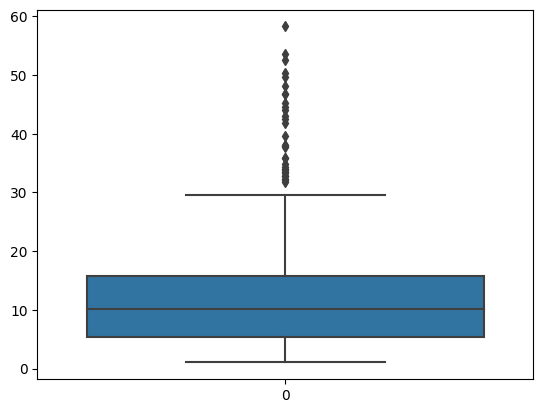

In [10]:
 sns.boxplot(df_new['PM10'])

<AxesSubplot: >

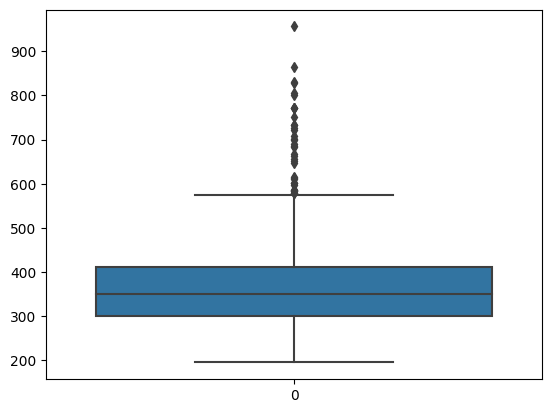

In [11]:
 sns.boxplot(df_new['CO'])

<AxesSubplot: >

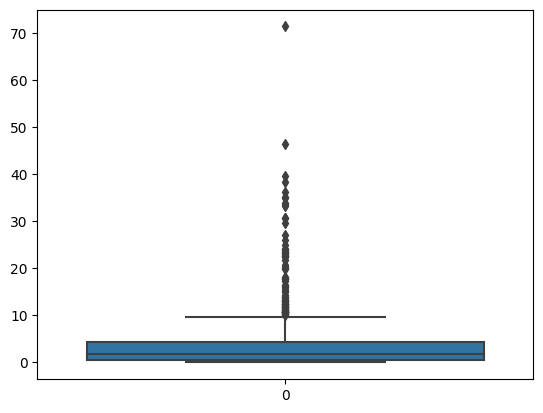

In [12]:
 sns.boxplot(df_new['NO'])

<AxesSubplot: >

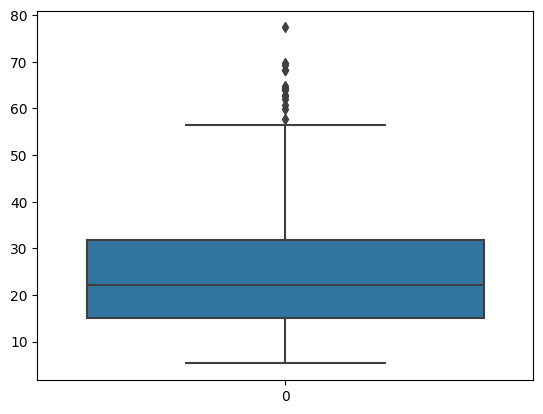

In [13]:
 sns.boxplot(df_new['NO2'])

In [14]:
 sns.boxplot(df_new['O3'])

<AxesSubplot: >

<AxesSubplot: >

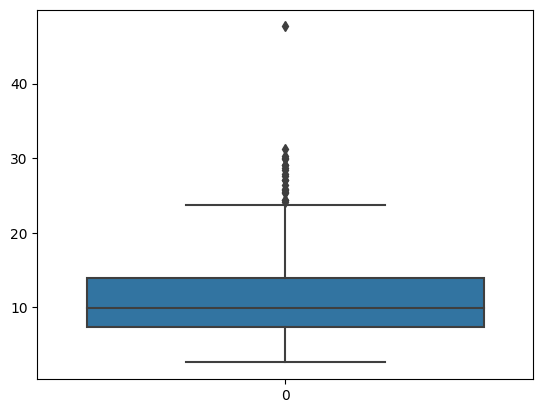

In [15]:
 sns.boxplot(df_new['SO2'])

In [16]:
 sns.boxplot(df_new['NH3'])

<AxesSubplot: >

In [17]:
 sns.boxplot(df_new['PM2_5'])

<AxesSubplot: >

In [18]:
sns.pairplot(data=df_new)

In [19]:
X=df_new.drop(['AQI'],axis=1)
y=df_new['AQI']
print(X.shape)
print(y.shape)

(643, 8)
(643,)


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Random Forest Regressor

In [21]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(X_train,y_train)
tr_pred=model3.predict(X_test)
model3.score(X_test,y_test)

0.9383998669710457

# Gradient Boost Regressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model3=GradientBoostingRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9363028230058835

# Extra Tree Regressor

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
model3=ExtraTreesRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9430853442307034